# 0. Librerías

In [1]:
import pandas as pd
import numpy as np
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

# 1. El dataset original

Los sistemas de detección de intrusos (IDS) y los sistemas de prevención (IPS) son las herramientas de defensa más importantes que facilitan a los usuarios de la red deshacerse de las amenazas en línea. Debido al crecimiento de la tecnología, se ha incrementado la demanda de la red. Con la aparición de conceptos como Internet de las cosas (IoT), servicios en la nube (Cloud) y redes definidas por software (SDN), los usuarios y la organización tienen mayores facilidades para el acceso al servicio y los datos según sus requisitos. Sin embargo, además de la facilidad de esas redes, existen algunos inconvenientes debido a las amenazas en línea. Los ciberdelincuentes suelen inyectar tráfico malicioso en la SDN para robar información confidencial de allí. El ataque a la red en la SDN se puede detectar mediante la supervisión del tráfico. Los datos seleccionados contienen el registro del tráfico en tiempo real que se ha capturado diariamente. Los datos pertenecen originalmente al archivo de captura de paquetes o PCAP y luego se convirtió a un archivo tabular.

Los datos contienen 79 características cuantitativas y cualitativas, de las cuales 1 característica representa los atributos cualitativos y 78 características representan los atributos cuantitativos. Estos datos se utilizarán con fines analíticos y para detectar intrusiones en la red. Los datos totales se han obtenido en varios segmentos que contienen diferentes tipos de tráfico de red.

De todos esos tipos de datos de tráfico de red, se ha elegido un determinado conjunto de datos que contiene los registros de tráfico DDoS, Intrusió XSS, Intrusión por fuerza bruta, Inyección SQL y tráfico benigno. El conjunto de datos seleccionado contiene 1188333 filas de observación entre intrusión y tráfico incluido en la lista blanca junto con 79 características.


Dataset tomado desde [https://www.kaggle.com/datasets/subhajournal/sdn-intrusion-detection](https://www.kaggle.com/datasets/subhajournal/sdn-intrusion-detection)

In [2]:
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-57BtQwaNxYvdkKVUJu0n15Kx3OwgJRj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-57BtQwaNxYvdkKVUJu0n15Kx3OwgJRj" -O SDN_Intrusion.csv && rm -rf /tmp/cookies.txt

In [3]:
ds_or = pd.read_csv('/content/SDN_Intrusion.csv')

# 2. Primera exploración

Echemos un primer vistazo dataset


In [4]:
ds_or.head(n=7)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,80,9865922,5,0,30,0,6,6,6.000000,...,20,1986.00000,0.0000,1986,1986,9.863936e+06,0.00000,9863936,9863936,DDoS
1,1,443,158423,24,22,703,24564,453,0,29.291667,...,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,2,443,61163904,14,12,993,3445,620,0,70.928571,...,20,147216.66670,152989.5108,459505,84515,1.000000e+07,21747.04690,10100000,9999779,BENIGN
3,3,443,110544045,18,18,1213,4216,812,0,67.388889,...,20,75305.72727,133115.4997,476664,35046,9.970950e+06,80601.91884,10000000,9728297,BENIGN
4,4,53,185,2,2,104,136,52,52,52.000000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
5,5,53,672,1,1,79,161,79,79,79.000000,...,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
6,6,51323,490655,6,2,11607,26,5840,0,1934.500000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN


In [5]:
ds_or.shape

(1188333, 80)

Distribución de clases por paquetes

**NOTE**. El dataset se ve claramente desbalanceado

In [6]:
ds_or['Class'].value_counts()

BENIGN                        798322
DDoS                          383439
Web Attack � Brute Force        4550
Web Attack � XSS                1962
Web Attack � Sql Injection        60
Name: Class, dtype: int64

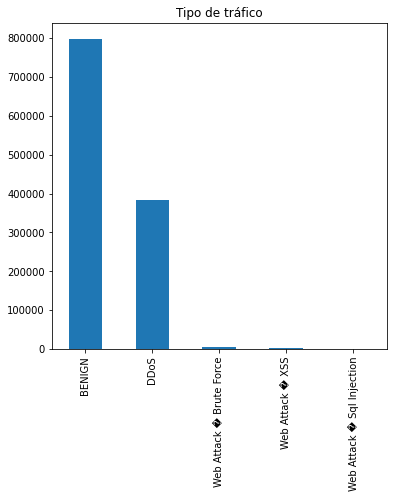

In [7]:
plot = ds_or['Class'].value_counts().plot(kind='bar', figsize=(6, 6), title='Tipo de tráfico')

Distribución de clases por porcentajes

In [8]:
100 * ds_or['Class'].value_counts() / len(ds_or['Class'])

BENIGN                        67.179991
DDoS                          32.266966
Web Attack � Brute Force       0.382889
Web Attack � XSS               0.165105
Web Attack � Sql Injection     0.005049
Name: Class, dtype: float64

Revisemos un paquete cualquiera con todas sus características

In [9]:
with pd.option_context('display.max_rows', None,): 
    display(ds_or.iloc[randint(0, ds_or.shape[0]-1)])

Unnamed: 0                           796763
 Destination Port                        80
 Flow Duration                     96103697
 Total Fwd Packets                       14
 Total Backward Packets                  13
Total Length of Fwd Packets             924
 Total Length of Bwd Packets           1604
 Fwd Packet Length Max                  429
 Fwd Packet Length Min                    0
 Fwd Packet Length Mean                66.0
 Fwd Packet Length Std           153.796569
Bwd Packet Length Max                   796
 Bwd Packet Length Min                    0
 Bwd Packet Length Mean          123.384615
 Bwd Packet Length Std            298.52346
Flow Bytes/s                      26.304919
 Flow Packets/s                    0.280947
 Flow IAT Mean                  3696296.038
 Flow IAT Std                   4789285.305
 Flow IAT Max                      10000000
 Flow IAT Min                            93
Fwd IAT Total                      86600000
 Fwd IAT Mean                   

Revisemos qué tipo de dato es cada caraterística.

**NOTE**. Algunos nombres presentan espacios que pueden dificultar su llamado en fórmulas posteriores 

In [10]:
with pd.option_context('display.max_rows', None,): 
    display(ds_or.dtypes)

Unnamed: 0                        int64
 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64


Revisemos el tipo de información almacenada en cada columna.

**NOTE**. Flow Bytes/s (característica 15) presenta entradas nulas

In [11]:
ds_or.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188333 entries, 0 to 1188332
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1188333 non-null  int64  
 1    Destination Port             1188333 non-null  int64  
 2    Flow Duration                1188333 non-null  int64  
 3    Total Fwd Packets            1188333 non-null  int64  
 4    Total Backward Packets       1188333 non-null  int64  
 5   Total Length of Fwd Packets   1188333 non-null  int64  
 6    Total Length of Bwd Packets  1188333 non-null  int64  
 7    Fwd Packet Length Max        1188333 non-null  int64  
 8    Fwd Packet Length Min        1188333 non-null  int64  
 9    Fwd Packet Length Mean       1188333 non-null  float64
 10   Fwd Packet Length Std        1188333 non-null  float64
 11  Bwd Packet Length Max         1188333 non-null  int64  
 12   Bwd Packet Length Min      

# 3. Análisis del dataset

Todas nuetras características son cualitativas. Únicamente **Class** está definida como cuantitativa.

Revisemos algunos parámetros estadísticos de la información numérica para tener una idea de la información contenida en el dataset



In [12]:
ds_or.describe()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,...,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06,1.188333e+06
mean,5.941660e+05,8.480243e+03,1.462180e+07,9.596210e+00,1.078102e+01,7.843011e+02,1.796263e+04,3.814859e+02,2.582180e+01,1.154389e+02,...,7.304538e+00,2.325059e+01,1.371559e+05,2.729091e+04,1.888764e+05,1.226735e+05,7.470353e+06,2.118714e+06,8.970219e+06,5.940991e+06
std,3.430423e+05,1.915062e+04,3.176010e+07,7.448225e+02,9.896083e+02,5.758152e+03,2.292589e+06,1.456663e+03,1.267389e+02,3.919215e+02,...,7.144846e+02,5.601114e+00,7.064932e+05,2.821286e+05,9.176914e+05,6.787117e+05,1.885680e+07,9.859436e+06,2.256598e+07,1.730238e+07
min,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.970830e+05,5.300000e+01,1.679600e+04,2.000000e+00,1.000000e+00,2.600000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.941660e+05,8.000000e+01,2.791840e+05,3.000000e+00,2.000000e+00,4.800000e+01,1.410000e+02,2.000000e+01,6.000000e+00,8.800000e+00,...,2.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.912490e+05,4.430000e+02,6.103837e+06,5.000000e+00,5.000000e+00,9.000000e+01,5.522000e+03,4.800000e+01,3.200000e+01,4.500000e+01,...,4.000000e+00,3.200000e+01,8.930000e+02,0.000000e+00,8.930000e+02,8.760000e+02,5.921227e+06,0.000000e+00,5.925981e+06,5.503806e+06
max,1.188332e+06,6.553200e+04,1.200000e+08,2.007550e+05,2.706860e+05,1.197199e+06,6.270000e+08,2.336000e+04,1.729000e+03,4.183057e+03,...,1.924910e+05,6.000000e+01,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


En un análisis de seguridad informática inicial, es de gran interés identificar cuáles protocolos son el objetivo o vehículo de los ataques. La identificación del protocolo irá ligada al puerto de destino.

**NOTE**. En este dataset, los ataques son casi totalmente orientados al puerto 80 correspondiente al protocolo HTTP.

In [13]:
t_depo = pd.crosstab(index=ds_or[' Destination Port'], columns=ds_or['Class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

t_depo.head(25)

Class,BENIGN,DDoS,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS
Destination Port,,,,,
0,0.074281,0.000000,0.0,0.0,0.0
21,0.223343,0.000000,0.0,0.0,0.0
22,0.513828,0.000000,0.0,0.0,0.0
42,0.002631,0.000000,0.0,0.0,0.0
53,40.797448,0.000000,0.0,0.0,0.0
80,10.409208,99.998435,100.0,100.0,100.0
88,0.253532,0.000000,0.0,0.0,0.0
123,1.552381,0.000000,0.0,0.0,0.0
135,0.043842,0.000000,0.0,0.0,0.0


Puede revisar el impacto de los ataques en TODOS los protocolos revisando la cantidad de paquetes con ataque por puerto de destino.

**ADVERTENCIA**. Los puertos llegan a 65535, esta celda despliega gran cantidad de información

In [14]:
with pd.option_context('display.max_rows', None,): 
    display(pd.crosstab(index=ds_or[' Destination Port'], columns=ds_or['Class'], margins=True))

Output hidden; open in https://colab.research.google.com to view.

Contamos con 79 características cuantitativas. ¿Son necesarias todas? ¿Podemos prescindir de algunas para disminuir el impacto de cómputo cuando calculamos el modelo?

La correlación es un factor importante para los científicos de datos. Indica cómo las variables de un conjunto de datos se relacionan entre sí y cómo se mueven entre sí. El valor de correlación varía de -1 a +1. Una correlación de 0 significa que dos variables son independientes entre sí. Una correlación positiva indica que las variables se mueven en la misma dirección y una correlación negativa indica lo contrario.

El mapa de calor se utiliza para representar gráficamente estos valores con diferentes tonos de color para diferentes valores. Ayuda a visualizar con mucha claridad.

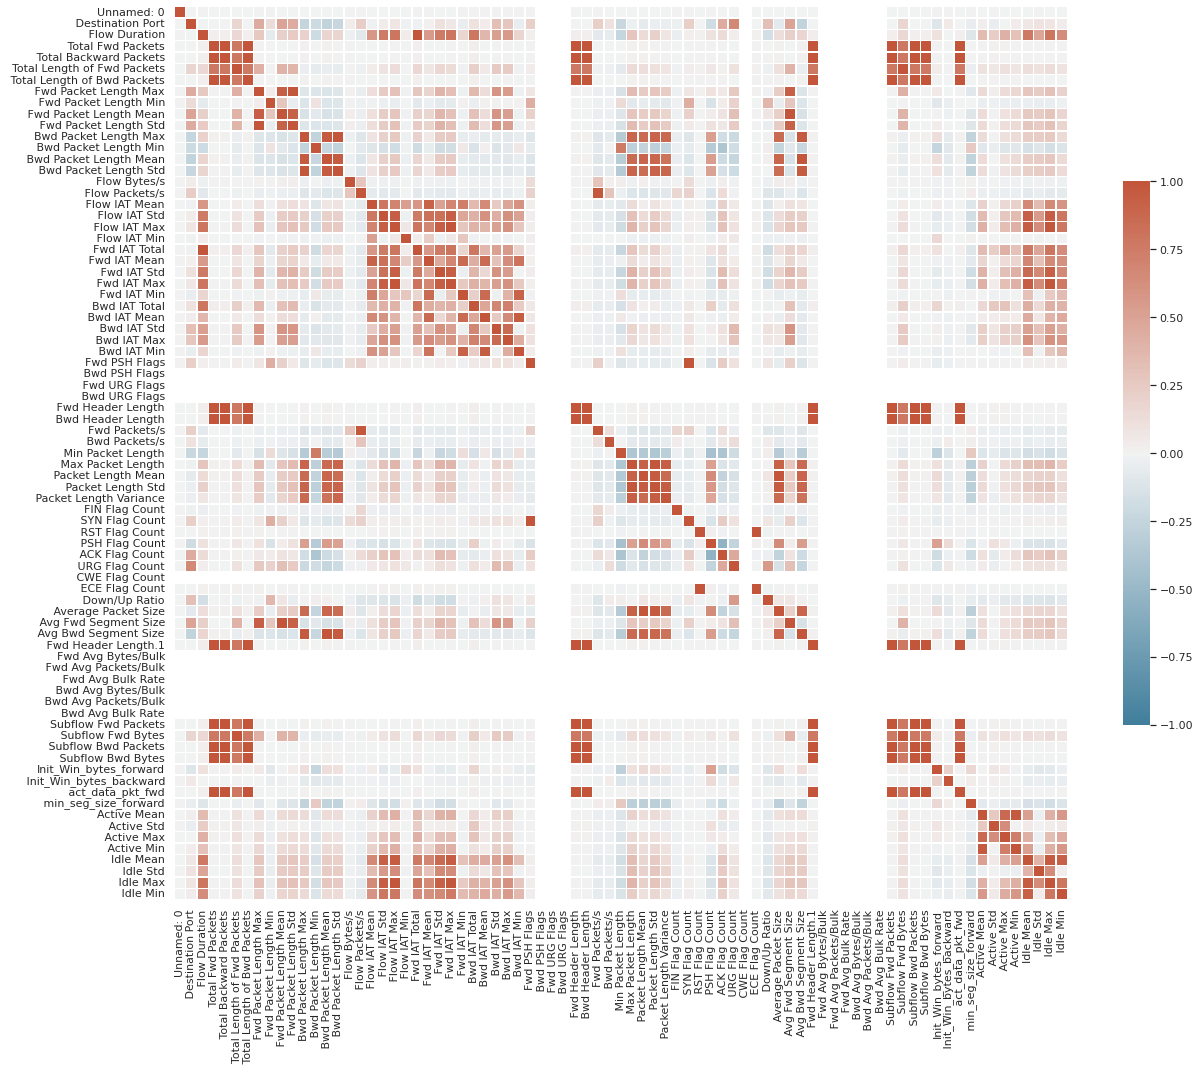

In [15]:
sns.set_theme(style="white")

# Calculemos la matriz de correlación
corr = ds_or.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuremos la figura
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

Ahora veamos los valores de correlación. Nos concentramos en la parte superior a la diagonal

In [16]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper  

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Unnamed: 0,NaN,-0.000621,0.00054,-0.000175,-0.000139,-0.000023,-0.000255,0.000196,0.000512,-0.000404,...,-0.000206,0.000116,-0.001399,0.000738,-0.000850,-0.001658,-0.001108,0.000346,-0.000821,-0.001349
Destination Port,NaN,NaN,-0.00091,-0.003985,-0.003256,0.176608,-0.003394,0.448691,0.136995,0.496940,...,-0.003593,-0.042251,0.027018,-0.041205,-0.003277,0.037206,0.063712,0.086534,0.079944,0.035327
Flow Duration,NaN,NaN,NaN,0.022554,0.021560,0.159076,0.017571,0.265294,-0.063156,0.211439,...,0.020347,-0.101451,0.345223,0.233749,0.415073,0.309125,0.770173,0.485682,0.793775,0.638278
Total Fwd Packets,NaN,NaN,NaN,NaN,0.998729,0.779850,0.993767,0.003465,-0.002142,-0.001108,...,0.999299,-0.003201,0.004872,0.009718,0.008470,0.002575,0.001197,-0.000172,0.000970,0.001311
Total Backward Packets,NaN,NaN,NaN,NaN,NaN,0.779315,0.987363,0.003600,-0.001525,-0.000931,...,0.997446,-0.002859,0.004166,0.008413,0.007022,0.002338,0.000563,-0.000583,0.000297,0.000803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.517738,-0.031483,0.423342,0.576934
Idle Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398234,0.958822,0.929077
Idle Std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642130,0.031096
Idle Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.786000


Busquemos intuitivamente algunas de las correlaciones más significativas que señalarían unas características como buenas candidatas para eliminar del modelo.

In [23]:
to_drop = [column for column in upper.columns if any(np.abs(upper[column]) >= 0.8)]
print('Caracterísitcas con alta correlación', len(to_drop))
print(to_drop)

Caracterísitcas con alta correlación 38
[' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']


Por ejemplo, la característica **Total Backward Packets** tiene fuerte correlación con **Total Fwd Packets**, como era de esperarse en un flujo bidireccional.

In [20]:
with pd.option_context('display.max_rows', None,):
    display(upper.loc[:,' Total Backward Packets'])

Unnamed: 0                     -0.000139
 Destination Port              -0.003256
 Flow Duration                  0.021560
 Total Fwd Packets              0.998729
 Total Backward Packets              NaN
Total Length of Fwd Packets          NaN
 Total Length of Bwd Packets         NaN
 Fwd Packet Length Max               NaN
 Fwd Packet Length Min               NaN
 Fwd Packet Length Mean              NaN
 Fwd Packet Length Std               NaN
Bwd Packet Length Max                NaN
 Bwd Packet Length Min               NaN
 Bwd Packet Length Mean              NaN
 Bwd Packet Length Std               NaN
Flow Bytes/s                         NaN
 Flow Packets/s                      NaN
 Flow IAT Mean                       NaN
 Flow IAT Std                        NaN
 Flow IAT Max                        NaN
 Flow IAT Min                        NaN
Fwd IAT Total                        NaN
 Fwd IAT Mean                        NaN
 Fwd IAT Std                         NaN
 Fwd IAT Max    